In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


import warnings
warnings.filterwarnings("ignore")

# 1. 데이터 탐색

## 1.1 데이터 불러오기 & 간단한 탐색

In [2]:
PATH = '/content/drive/MyDrive/dacon_data' # 구글 드라이브내 데이터에 연결루트

In [3]:
# 구글 드라이브 연결루트에 각각의 파일들을 연결
age_gender = pd.read_csv(PATH + '/age_gender_info.csv')
train = pd.read_csv(PATH + '/train.csv')
test = pd.read_csv(PATH + '/test.csv')

In [4]:
submission = pd.read_csv(PATH + '/sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

- train 데이터에서 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보10분거리 내 버스정류장 수에 NULL값 존재

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

- test데이터에서는 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(호나승노선수 반영)에 NULL값 존재

In [7]:
# 임대보증금과 임대료의 '-'을 null로 바꾼 후 float로 타입 변경
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

## 1.2 NULL 값이 있는 변수 탐색

#### (1) 임대보증금, 임대료

In [8]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [9]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [10]:
train[train.임대보증금.isnull()].자격유형.value_counts()

D    569
H      8
K      4
Name: 자격유형, dtype: int64

In [11]:
test[test.임대보증금.isnull()].자격유형.value_counts()

D    180
L      4
C      2
Name: 자격유형, dtype: int64

In [12]:
train[train.자격유형.isin(['D', 'H', 'K'])].info() 
# isin은 열의 list안의 값들을 포함하고 있는 것을 골라낼때 사용

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 88 to 2919
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          757 non-null    object 
 1   총세대수                          757 non-null    int64  
 2   임대건물구분                        757 non-null    object 
 3   지역                            757 non-null    object 
 4   공급유형                          757 non-null    object 
 5   전용면적                          757 non-null    float64
 6   전용면적별세대수                      757 non-null    int64  
 7   공가수                           757 non-null    float64
 8   자격유형                          757 non-null    object 
 9   임대보증금                         176 non-null    float64
 10  임대료                           176 non-null    float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  623 non-null    float64
 12  도보 10분거리 내 버스정류장 수            757 non-null    float64
 13  단지내

In [13]:
test[test.자격유형.isin(['D','L','C'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 73 to 1017
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          226 non-null    object 
 1   총세대수                          226 non-null    int64  
 2   임대건물구분                        226 non-null    object 
 3   지역                            226 non-null    object 
 4   공급유형                          226 non-null    object 
 5   전용면적                          226 non-null    float64
 6   전용면적별세대수                      226 non-null    int64  
 7   공가수                           226 non-null    float64
 8   자격유형                          226 non-null    object 
 9   임대보증금                         40 non-null     float64
 10  임대료                           40 non-null     float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  201 non-null    float64
 12  도보 10분거리 내 버스정류장 수            226 non-null    float64
 13  단지내

In [14]:
# 임대보증금과 임대료가 NULL인경우 0으로 대체하는것이 좋아보인다
train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

#### 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수

- NULL값을 0으로 대체

In [15]:
subway_null_codes = train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

NaN    211
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [16]:
subway_null_codes = test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
test.loc[test.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

NaN    42
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [17]:
bus_null_codes = train[train['도보 10분거리 내 버스정류장 수'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(bus_null_codes), '도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

NaN    4
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [18]:
bus_null_codes = test[test['도보 10분거리 내 버스정류장 수'].isnull()].단지코드.unique()
test.loc[train.단지코드.isin(bus_null_codes), '도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

Series([], Name: 도보 10분거리 내 버스정류장 수, dtype: int64)

#### (3) 자격유형

In [19]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [20]:
test[test.단지코드=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


NaN값은 A로 채우면 될 것으로 보인다

In [21]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

In [22]:
test[test.단지코드=='C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,0.0,0.0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,0.0,0.0,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,0.0,0.0,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,0.0,0.0,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,0.0,0.0,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,0.0,0.0,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,0.0,0.0,0.0,2.0,173.0


임대료와 임대보증금이 존재하는 경우 자격유형이 C이므로 NaN값은 C로 한다

In [23]:
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

#### 1.3. 중복확인

In [24]:
train.shape, train.drop_duplicates().shape # 중복존재 확인

((2952, 15), (2632, 15))

In [25]:
test.shape, test.drop_duplicates().shape

((1022, 14), (949, 14))

- 중복 데이터는 제거하고 분석을 진행하는 것이 좋아보인다

In [26]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [27]:
train[train.단지코드=='C2483']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0


In [28]:
print(f"단지코드 C2483에서 유일한 값을 가지는 변수들:\n{list(train.columns[train[train.단지코드=='C2483'].nunique()==1])}")

단지코드 C2483에서 유일한 값을 가지는 변수들:
['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '공가수', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']


In [29]:
train.groupby(['단지코드']).nunique(dropna=False)

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,5,6,1,1,3,3,1,1,1,1
C1004,1,2,1,2,15,3,1,2,3,3,1,1,1,1
C1005,1,1,1,1,3,3,1,1,3,3,1,1,1,1
C1013,1,1,1,1,4,5,1,1,3,3,1,1,1,1
C1014,1,1,1,1,6,7,1,1,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,5,6,1,1,4,4,1,1,1,1
C2666,1,1,1,1,4,6,1,1,2,2,1,1,1,1
C2670,1,1,1,1,4,3,1,1,3,3,1,1,1,1


In [30]:
train.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)

총세대수                             423
임대건물구분                           456
지역                               423
공급유형                             488
전용면적                            1898
전용면적별세대수                        2230
공가수                              423
자격유형                             510
임대보증금                           1277
임대료                             1289
도보 10분거리 내 지하철역 수(환승노선 수 반영)     423
도보 10분거리 내 버스정류장 수               423
단지내주차면수                          423
등록차량수                            423
dtype: int64

- 위의 값을 보아 값이 423이 넘는 경우 하나의 단지코드에 둘 이상의 항목이 존재한다는 것을 보여준다
- 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료는 하나의 단지코드에 둘 이상의 항목이 존재함을 보여준다.
- 단지코드별 집계시 총세대수, 지역, 공가수, 도보 10분거리 내지하철역 수(환긍노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수는 그대로 사용하고, 나머지 변수들은 각 항목들을 변수로 만들어 사용하는 것이 좋아보인다.

### 1.4 단지코드 별 집계

#### (1) 하나의 단지코드에 하나의 값만 존재하는 변수들
- 총세대수, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수

In [31]:
unique_cols = ['총세대수','지역', '공가수',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col !='등록차량수']].drop_duplicates()

In [32]:
train_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,
C2483,900,경상북도,38.0,0.0,3.0,1425.0,1015.0
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0
...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0


In [33]:
test_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
단지코드,,,,,,
C1072,754,경기도,14.0,0.0,2.0,683.0
C1128,1354,경기도,9.0,0.0,3.0,1216.0
C1456,619,부산광역시,18.0,0.0,16.0,547.0
C1840,593,전라북도,7.0,0.0,3.0,543.0
C1332,1297,경기도,11.0,0.0,2.0,1112.0
...,...,...,...,...,...,...
C2456,349,제주특별자치도,17.0,0.0,4.0,270.0
C1266,596,충청북도,35.0,0.0,1.0,593.0
C2152,120,강원도,9.0,0.0,1.0,40.0


#### (2) 하나의 단지코드에 둘 이상의 값이 존재하는 변수들
- 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료

In [34]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

#### 1) 임대건물구분: 아파트/상가
- 주상복합인 경우 주차수요가 주거인경우보다 많지 ㅇ낳을까? ==> 상가 직원들도 차량 등록이 가능다면 상가 당 주차수요는 일반 가구보다 높을 수 있다.
- 상가의 전용면적별세대수는 모두 1
- 우선 임대건물구분을 열로 올려서 단지가 주상복합인지 아닌지 구분할 수 있게 만들어야 한다.

In [35]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.0,1.0
C1004,1.0,1.0
C1005,0.0,1.0
C1013,0.0,1.0
C1014,0.0,1.0
...,...,...
C2663,0.0,1.0
C2666,0.0,1.0
C2670,0.0,1.0


#### 공급유형


In [36]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1730,619.0
임대상가,285,112.0
행복주택,203,121.0
공공임대(10년),203,34.0
영구임대,149,44.0
공공임대(50년),31,13.0
공공임대(분납),12,6.0
장기전세,9,NaN
공공분양,7,NaN
공공임대(5년),3,NaN


In [37]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [38]:
set(train.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [39]:
set(test.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [40]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1000,0.0,0.0,1.0,0.0,0.0,0.0
C1004,0.0,0.0,0.0,1.0,1.0,0.0
C1005,0.0,0.0,1.0,0.0,0.0,0.0
C1013,0.0,0.0,1.0,0.0,0.0,0.0
C1014,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
C2663,0.0,0.0,1.0,0.0,0.0,0.0
C2666,0.0,0.0,1.0,0.0,0.0,0.0
C2670,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
reshape_cat_features(data=test, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1003,0.0,0.0,0.0,0.0,0.0,1.0
C1006,0.0,0.0,0.0,1.0,1.0,0.0
C1016,0.0,0.0,1.0,0.0,0.0,0.0
C1019,0.0,0.0,1.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
C2653,0.0,0.0,1.0,0.0,0.0,0.0
C2675,0.0,0.0,1.0,0.0,0.0,0.0
C2676,0.0,0.0,0.0,1.0,1.0,0.0


#### 자격유형
- 변수생성 컨셉: 특정자격 유형이 많으면 그 단지는 등록차량수가 적을 것이다.
- 문제는 특성이 비슷한 항목끼리 묶여야 의미가 있을 것이나, 비식별화 되어 있어서 각 코드값이 무엇인지 정확히 알 수 없다는 점이다.
- 단지코드별 자격유형별 세대수를 알 수 있으면 좋으나, 이 데이터에서는 확인이 불가능
- 자격유형별 소득수준을 간접적으로 파악하기 위해 자격유형별 임대보증금의 평균, 임대료의 평균을 변수로 사용해 볼 수 있을듯 하다.

In [42]:
pd.concat([train.자격유형.value_counts(),
           test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1775,569.0
D,292,114.0
H,154,92.0
J,105,81.0
C,92,35.0
I,49,7.0
E,37,10.0
K,33,16.0
L,33,12.0
N,29,10.0


- B, F, O가 train에만 있고, test에는 존재하지 않는다


*   공공임대주택 공급대상

> 영구임대: 소득 1분위 - 1

> 국민인대: 소득 2~4분위 - 3

> 장기전세: 소득 3~4분위 - 2

> 공공임대(5년/10년/분납): 소득 3~5분위 - 3

> 행복주택: 소득 2~5분위 - 4

이렇게 나눌시 13개 항목이나, 자격유형의 항목수는 15개

















In [43]:
train.loc[train.자격유형=='B',['임대건물구분', '공급유형']].drop_duplicates()
# 자격유형 B는 공급유형이 모두 국민임대/장기전세, 공급유형이 국민임대/장기전세 일 때 자격유형이 어떤것이 있는지 확인하는 것이 좋을 것으로 보인다

,임대건물구분,공급유형
26,아파트,국민임대/장기전세


In [44]:
train.loc[train.공급유형.isin(['국민임대/장기전세']), '자격유형'].value_counts()

A    1524
H     154
E      34
B      18
G       9
Name: 자격유형, dtype: int64

국민임대/장기전세
- (일반)해당지역 거주 무주택세대구성원
- (특별/우선)3자녀 이상 가구
- (특별/우선)국가유공자
- (특별/우선)영구임대 입주자
- (특별/우선)비닐간이공작물 거주자
- (특별/우선)신혼부부(혼인기간 5년이내)
- (특별/우선)사업지구 철거민
- (특별/우선)기타 공급대상(고령자, 노부모부양자, 장애인, 파독근로자 등)
- 건수가 가장 많은 A는 해당지역 거주 무주택세대구성원으로 예상됨

In [45]:
# 다른 공급유형별 자격유형도 살펴본다
train.loc[train.공급유형.isin(['영구임대']), '자격유형'].value_counts()

C    92
I    49
F     3
E     3
A     2
Name: 자격유형, dtype: int64

영구임대
- (일반)생계급여 또는 의료급여 수급자
- (일반)국가유공자
- (특별/우선)수급자 선정기준의 소득인정액 이하인 국가유공자
- (특별/우선)귀환국군포로
- (특별/우선)수급자 신혼부부

In [46]:
train.loc[train.공급유형.isin(['공공임대(5년/10년/분납/분양)']), '자격유형'].value_counts()

A    218
D      7
Name: 자격유형, dtype: int64

공공임대(5년/10년/분납/분양)
- (일반)해당지역 거주무주택세대구성원
- (특별/우선)다자녀 특별
- (특별/우선)신혼부부 특별
- (특별/우선)생애최초 특별
- (특별/우선)노부모부양 특별
- (특별/우선)국가유공자 특별
- (특별/우선)기타 특별(장애인, 철거민 등)
- A는 '(일반)해당지역 거주무주택세대구성원'으로 추정됨

In [47]:
train.loc[train.공급유형.isin(['행복주택']), '자격유형'].value_counts()

J    105
K     33
L     33
N     29
M      2
O      1
Name: 자격유형, dtype: int64

행복주택
-대학생(취준생 포함), 사회초년생(제취준생 포함), 신혼부부(예비신혼부부, 대학생, 취준생 신혼부부 포함), 고령자, 주거급여수급자, 산업단지 근로자
- 이렇게 6개 항목이랑 매핑 될듯으로 보인다

In [48]:
train.loc[train.자격유형.isin(['J','L','K','N','M','O']), '공급유형'].value_counts()
# 'J', 'L', 'K', 'N', 'M', 'O' 는 공급유형이 행복주택인 경우에서만 나타난다
# 이것만 따로 묶는게 좋을듯

행복주택    203
Name: 공급유형, dtype: int64

In [49]:
train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

In [50]:
train.loc[train.자격유형.isin(['A']), '공급유형'].value_counts()

국민임대/장기전세             1524
공공임대(5년/10년/분납/분양)     218
공공임대(50년)               31
영구임대                     2
Name: 공급유형, dtype: int64

In [51]:
train.loc[train.자격유형.isin(['D']), '공급유형'].value_counts()

임대상가                  285
공공임대(5년/10년/분납/분양)      7
Name: 공급유형, dtype: int64

In [52]:
train.loc[train.자격유형.isin(['H']), '공급유형'].value_counts()

국민임대/장기전세    154
Name: 공급유형, dtype: int64

In [53]:
train.loc[train.자격유형.isin(['C']), '공급유형'].value_counts()

영구임대    92
Name: 공급유형, dtype: int64

In [54]:
train.loc[train.자격유형.isin(['I']), '공급유형'].value_counts()

영구임대    49
Name: 공급유형, dtype: int64

In [55]:
train.loc[train.자격유형.isin(['E']), '공급유형'].value_counts()

국민임대/장기전세    34
영구임대          3
Name: 공급유형, dtype: int64

In [56]:
train.loc[train.자격유형.isin(['B']), '공급유형'].value_counts()

국민임대/장기전세    18
Name: 공급유형, dtype: int64

In [57]:
train.loc[train.자격유형.isin(['G']), '공급유형'].value_counts()

국민임대/장기전세    9
Name: 공급유형, dtype: int64

In [58]:
train.loc[train.자격유형.isin(['F']), '공급유형'].value_counts()

영구임대    3
Name: 공급유형, dtype: int64

- 'H','B','E','G'는 국민임대/장기전세 공급대상(E는 영구임대인 경우도 있으나 국민임대/장기전세인 경우가 많아 여기에 포함시켰다.)
- 'C','I','F','G'는 영구임대 공급대상으로 묶어 보았다

In [59]:
train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [60]:
pd.concat([train.자격유형.value_counts(), 
           test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1775,569
D,292,114
국민임대/장기전세_공급대상,218,103
행복주택_공급대상,203,121
영구임대_공급대상,144,42


In [61]:
reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
단지코드,,,,,
C1000,1.0,0.0,0.0,0.0,0.0
C1004,0.0,1.0,0.0,1.0,0.0
C1005,1.0,0.0,0.0,0.0,0.0
C1013,1.0,0.0,0.0,0.0,0.0
C1014,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
C2663,0.0,0.0,1.0,0.0,0.0
C2666,1.0,0.0,0.0,0.0,0.0
C2670,1.0,0.0,0.0,0.0,0.0


In [62]:
reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
단지코드,,,,,
C1003,0.0,0.0,0.0,0.0,1.0
C1006,0.0,1.0,0.0,1.0,0.0
C1016,1.0,0.0,0.0,0.0,0.0
C1019,1.0,0.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
C2653,1.0,0.0,0.0,0.0,0.0
C2675,1.0,0.0,0.0,0.0,0.0
C2676,0.0,1.0,0.0,1.0,0.0


In [63]:
train_agg = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1)

test_agg = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')], axis=1)

In [64]:
train_agg.shape, test_agg.shape

((423, 20), (150, 19))

In [65]:
train_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2483,900,경상북도,38.0,0.0,3.0,1425.0,1015.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2437,90,충청북도,12.0,0.0,1.0,30.0,16.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
test_agg

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C1072,754,경기도,14.0,0.0,2.0,683.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
C1128,1354,경기도,9.0,0.0,3.0,1216.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
C1456,619,부산광역시,18.0,0.0,16.0,547.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1840,593,전라북도,7.0,0.0,3.0,543.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1332,1297,경기도,11.0,0.0,2.0,1112.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,349,제주특별자치도,17.0,0.0,4.0,270.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1266,596,충청북도,35.0,0.0,1.0,593.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C2152,120,강원도,9.0,0.0,1.0,40.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
C1267,675,경상남도,38.0,0.0,1.0,467.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


### 문자형 데이터 숫자로 매핑

In [67]:
local_map={}
for i, loc in enumerate(train_agg['지역'].unique()):
  local_map[loc]=i

train_agg['지역'] = train_agg['지역'].map(local_map)
test_agg['지역'] = test_agg['지역'].map(local_map)

In [68]:
train_agg, test_agg

(       총세대수  지역   공가수  ...  자격유형_국민임대/장기전세_공급대상  자격유형_영구임대_공급대상  자격유형_행복주택_공급대상
 C2483   900   0  38.0  ...                  0.0             0.0             0.0
 C2515   545   1  17.0  ...                  0.0             0.0             0.0
 C1407  1216   2  13.0  ...                  0.0             0.0             0.0
 C1945   755   3   6.0  ...                  1.0             0.0             0.0
 C1470   696   4  14.0  ...                  0.0             0.0             0.0
 ...     ...  ..   ...  ...                  ...             ...             ...
 C2586    90   9   7.0  ...                  0.0             0.0             1.0
 C2035   492   5  24.0  ...                  0.0             0.0             0.0
 C2020    40   8   7.0  ...                  0.0             0.0             1.0
 C2437    90  11  12.0  ...                  0.0             1.0             0.0
 C2532   239   5   7.0  ...                  0.0             0.0             0.0
 
 [423 rows x 20 columns],


# 2. Catboost 모델링

In [136]:
cat_features = ['지역']
target_col = '등록차량수'

In [70]:
!pip install catboost


     |████████████████████████████████| 67.4 MB 26 kB/s 


In [155]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
X=train_agg.drop(columns=[target_col])
y=train_agg[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

catb = CatBoostRegressor(
         cat_features=cat_features,
         loss_function='MAE',
         n_estimators=500, 
         learning_rate=0.06, 
         random_state=42
    )
    
history=catb.fit(X, y, eval_set=(X_test,y_test))
history


0:	learn: 277.4118196	test: 235.2392934	best: 235.2392934 (0)	total: 2.14ms	remaining: 1.07s
1:	learn: 266.4298379	test: 224.0178113	best: 224.0178113 (1)	total: 4.07ms	remaining: 1.01s
2:	learn: 257.8292417	test: 215.3368427	best: 215.3368427 (2)	total: 5.95ms	remaining: 985ms
3:	learn: 247.1759720	test: 205.9418052	best: 205.9418052 (3)	total: 8.06ms	remaining: 1000ms
4:	learn: 239.3176483	test: 197.9013684	best: 197.9013684 (4)	total: 10.2ms	remaining: 1s
5:	learn: 232.1573703	test: 189.5980473	best: 189.5980473 (5)	total: 12.2ms	remaining: 1.01s
6:	learn: 224.9485614	test: 183.0866966	best: 183.0866966 (6)	total: 14.7ms	remaining: 1.03s
7:	learn: 217.3364841	test: 177.4263119	best: 177.4263119 (7)	total: 16.7ms	remaining: 1.03s
8:	learn: 210.9650769	test: 171.9356024	best: 171.9356024 (8)	total: 18.7ms	remaining: 1.02s
9:	learn: 205.7324996	test: 167.7201681	best: 167.7201681 (9)	total: 20.9ms	remaining: 1.02s
10:	learn: 199.5489605	test: 163.0527807	best: 163.0527807 (10)	total: 2

In [160]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['X', 'y'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['X', 'y'], loc='upper left')
plt.show()

AttributeError: ignored

In [156]:
import matplotlib.pyplot as plt
# loss그래프
def loss_plot(history):
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [157]:
def accuracy_plot(history):
  plt.plot(history.history['accuracy'], label='Train accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [159]:
loss_plot(history)

AttributeError: ignored

In [72]:
# sample_submission = pd.read_csv(PATH + '/sample_submission.csv')
# sample_submission.head()

In [73]:
submission['num'] = catb.predict(test_agg)

In [74]:
submission

,code,num
0,C1072,692.018928
1,C1128,1207.614076
2,C1456,576.899856
3,C1840,510.826965
4,C1332,1053.763038
...,...,...
145,C2456,245.798299
146,C1266,404.620669
147,C2152,36.391768
148,C1267,218.635146


In [75]:
submission.to_csv('submission_catb_baseline_20210730.csv', index=False)

# 3.랜덤포레스트 학습

In [174]:
train_agg1 = train_agg.reset_index()
test_agg1 = test_agg.reset_index()

In [175]:
train_agg1 = train_agg1.fillna(-1)
test_agg1 = test_agg1.fillna(-1)

In [176]:
# test_agg1

In [177]:
x_train = train_agg1.iloc[:, 3:-1]
y_train = train_agg1.iloc[:,6]
x_test = test_agg1.iloc[:,1:]

In [178]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

In [179]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [82]:
# x_train

In [83]:
# y_train

In [84]:
# x_test

In [180]:
history = model.fit(x_train, y_train)
history

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [181]:
x_test = x_test.drop(['총세대수', '지역'], axis=1)

In [87]:
# x_test

In [173]:
pred=model.predict(x_test)

In [182]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['x_trian', 'y_train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['x_train', 'y_train'], loc='upper left')
plt.show()

AttributeError: ignored

In [89]:
submission['num'] = pred

In [90]:
submission.to_csv('submission_randomforest_20210801.csv', index=False)

# 4. GradientBoosting

In [91]:
x_train = train_agg.iloc[:,1:-1]
y_train = train_agg.iloc[:,6]
x_test = test_agg.iloc[:,1:]

In [92]:
x_train

,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상
C2483,0,38.0,0.0,3.0,1425.0,1015.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C2515,1,17.0,0.0,3.0,624.0,205.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C1407,2,13.0,1.0,1.0,1285.0,1064.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C1945,3,6.0,1.0,3.0,734.0,730.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
C1470,4,14.0,0.0,2.0,645.0,553.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,9,7.0,0.0,3.0,66.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2035,5,24.0,0.0,1.0,521.0,246.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C2020,8,7.0,1.0,2.0,25.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2437,11,12.0,0.0,1.0,30.0,16.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
y_train

C2483    1015.0
C2515     205.0
C1407    1064.0
C1945     730.0
C1470     553.0
          ...  
C2586      57.0
C2035     246.0
C2020      19.0
C2437      16.0
C2532     146.0
Name: 등록차량수, Length: 423, dtype: float64

In [94]:
x_train = x_train.fillna(-1)
y_train = y_train.fillna(-1)
x_test = x_test.fillna(-1)

In [95]:
from sklearn.metrics import make_scorer
def rmse(p,a):
    difference = p-a
    squared = difference ** 2
    mean = squared.mean()
    score = np.sqrt(mean)
    return score
rmse_scorer = make_scorer(rmse, greater_is_better=False)
rmse_scorer

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth':[1,2,3,4,5,6,7],
    'random_state':[10,30,50,70,90],
}
GS = GridSearchCV(model, param_grid=parameters, cv=20, scoring=rmse_scorer)
GS.fit(x_train,y_train)

GS.best_params_

{'max_depth': 3, 'random_state': 70}

#### 추론

In [96]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import mean_absolute_error

# model_GBoost = GradientBoostingRegressor(n_estimators=1000, 
#                                          learning_rate=0.05, 
#                                          max_depth=3,
#                                          max_features='sqrt', 
#                                          min_samples_leaf=10,
#                                          min_samples_split=5,
#                                          loss='huber',
#                                          random_state=70)
# model_GBoost.fit(x_train, y_train)
# GBoost_predictions=model_GBoost.predict(x_test)
# train_GBoost=model_GBoost.predict(x_train)

In [97]:
# GBoost_predictions

In [98]:
# predictions=GBoost_predictions

# submission['num'] = predictions
# submission.to_csv('GBoost_model.csv', index=False)

### ElasticNet, Lasoo

In [99]:
# from sklearn.linear_model import ElasticNet, Lasso

# model_Lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.1, random_state=20))
# model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=20))

# model_Lasso.fit(x_train, y_train)
# Lasso_predictions=model_Lasso.predict(x_test)
# train_Lasso=model_Lasso.predict(x_train)

# model_ENet.fit(x_train, y_train)
# ENet_predictions=model_ENet.predict(x_test)
# train_ENet=model_ENet.predict(x_train)

In [100]:
# Lasso_predictions

In [101]:
# ENet_predictions

In [102]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error

model_Lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.1, random_state=20))
model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=20))
model_GBoost = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.05, max_depth=3,max_features='sqrt', min_samples_leaf=10,min_samples_split=5,loss='huber',random_state=70)

model_Lasso.fit(x_train, y_train)
Lasso_predictions=model_Lasso.predict(x_test)
train_Lasso=model_Lasso.predict(x_train)

model_ENet.fit(x_train, y_train)
ENet_predictions=model_ENet.predict(x_test)
train_ENet=model_ENet.predict(x_train)

model_GBoost.fit(x_train, y_train)
GBoost_predictions=model_GBoost.predict(x_test)
train_GBoost=model_GBoost.predict(x_train)

In [103]:
# predictions=ENet_predictions

# submission['num'] = predictions
# submission.to_csv('ENet_model.csv', index=False)

In [104]:
predictions=(Lasso_predictions + ENet_predictions + GBoost_predictions) / 3

submission['num'] = predictions
submission.to_csv('include_supply_type_3_model.csv', index=False)

# 5. XGBOOST STACKING 학습


In [105]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [106]:
X=train_agg.drop(columns=[target_col])
y=train_agg[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.354, random_state=100)


In [107]:
X

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2483,900,0,38.0,0.0,3.0,1425.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2515,545,1,17.0,0.0,3.0,624.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,2,13.0,1.0,1.0,1285.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,3,6.0,1.0,3.0,734.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,4,14.0,0.0,2.0,645.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,9,7.0,0.0,3.0,66.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2035,492,5,24.0,0.0,1.0,521.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2020,40,8,7.0,1.0,2.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2437,90,11,12.0,0.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
X_train

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C1936,240,6,8.0,0.0,10.0,168.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2192,514,11,16.0,0.0,2.0,442.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1039,790,14,13.0,0.0,3.0,673.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
C1084,280,0,2.0,0.0,2.0,280.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1024,680,14,2.0,0.0,3.0,877.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2612,1684,15,27.0,0.0,2.0,1689.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1685,295,11,28.0,0.0,1.0,167.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C1103,935,5,31.0,0.0,2.0,939.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1310,1037,5,17.0,0.0,6.0,936.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
y_train

C1936     234.0
C2192     324.0
C1039     645.0
C1084     226.0
C1024     957.0
          ...  
C2612    1832.0
C1685     164.0
C1103     787.0
C1310    1084.0
C2073     301.0
Name: 등록차량수, Length: 273, dtype: float64

In [110]:
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')

xgb_model.fit(X_train, y_train)

[03:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


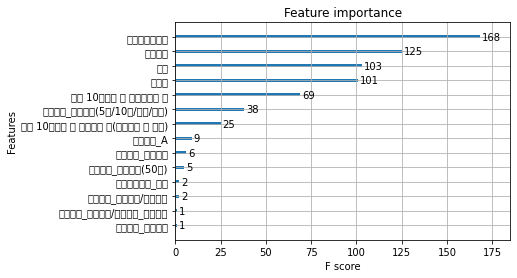

In [111]:
xgb.plot_importance(xgb_model)

In [112]:
y_test

C1962    401.0
C1565    588.0
C1516    475.0
C1911    831.0
C2520    386.0
         ...  
C1077    236.0
C2143    719.0
C2034    132.0
C1316     22.0
C2362    196.0
Name: 등록차량수, Length: 150, dtype: float64

In [113]:
predictions_xgb = xgb_model.predict(X_test)
predictions_xgb

array([ 277.0732  ,  482.37656 ,  355.55502 ,  871.18475 ,  394.03116 ,
        407.63684 ,  569.31726 ,  290.01132 ,  282.80014 ,  113.022964,
        870.8344  , 1222.034   ,  262.57413 ,  467.95834 ,  344.56696 ,
        647.9425  , 1128.4954  ,  500.13226 ,  378.5233  ,  858.12256 ,
         54.027767, 1206.277   ,  826.36566 ,  437.46112 ,  647.9425  ,
        277.7303  ,  744.3805  ,  864.68176 , 1343.7732  ,  437.54453 ,
        201.45512 ,  280.50803 , 1234.9764  ,  678.4609  ,  811.9528  ,
        484.49402 ,  516.12787 ,  458.53812 ,  476.6031  ,  182.70421 ,
        572.68756 ,  275.63544 , 1332.9845  ,  565.14374 ,  711.3758  ,
        641.66296 ,  858.5115  ,  394.34207 ,  647.9425  ,  402.64014 ,
        211.0626  ,   94.8915  ,  617.44635 ,  420.1083  ,  244.32082 ,
        856.4349  ,  254.76372 ,  371.9541  ,  423.6303  ,  858.59155 ,
       1244.9521  ,  192.23946 ,  339.40927 ,  277.7303  ,  565.4193  ,
       1671.497   ,  622.5171  ,  484.0406  ,  408.81143 ,  128.

In [114]:
from sklearn.metrics import explained_variance_score
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions_xgb, y_test))

0.9574627089283709
0.6966534478912529


In [115]:
len(predictions_xgb)

150

In [116]:
submission['num'] = predictions_xgb
submission.to_csv('xgboost_ver.csv', index=False)

In [117]:
# xgb_reg = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None)
# xgb_reg.fit(X_train, y_train)
# xgb_pred = xgb_reg.predict(X_test)
# xgb_pred_proba=xgb_reg.predict_proba(X_test)[:,1]

In [118]:
# train_agg1 = train_agg.reset_index()
# test_agg1 = test_agg.reset_index()
# train_agg1 = train_agg1.fillna(-1)
# test_agg1 = test_agg1.fillna(-1)

In [119]:
# train_agg1

In [120]:
# x_train = train_agg1.iloc[:, 3:-1]
# y_train = train_agg1.iloc[:,6]
# x_test = test_agg1.iloc[:,1:]

In [121]:
# y_train

In [122]:
# x_test

In [123]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [124]:
# target_col = '등록차량수'

In [125]:
# X=train_agg1.drop(columns=[target_col])
# y=train_agg1[target_col]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [126]:
# X_train = train_agg1.iloc[:, 3:-1]
# y_train = train_agg1.iloc[:,6]
# X_test = test_agg1.iloc[:,1:]

In [127]:
# X_train

In [128]:
# y_train

In [129]:
# X_test

In [130]:
# X_train = np.asarray(X_train, dtype = int)
# y_train = np.asarray(y_train, dtype = int)

In [131]:
# xgb_stk = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None)
# xgb_stk.fit(X_train, y_train)
# xgb_pred = xgb_stk.predict(X_test)
# xgb_pred_proba=xgb_stk.predict_proba(X_test)[:,1]

In [132]:
# from sklearn.model_selection import RandomizedSearchCV
# model = XGBRegressor(tree_method='auto')
# param_lst = {
#     'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],#0.1
#     'n_estimators' : [100,200],#10
#     'max_depth' : [3, 6, 9],#5
#     'min_child_weight' : [1, 5, 10, 20],#1
#     'reg_alpha' : [0.001, 0.01, 0.1],#0
#     'reg_lambda' : [0.001, 0.01, 0.1]#1
# }

# model.fit(x_train, y_train)
# xgb_predictions = model.predict(x_test)
# train_XGB = model_XGB.predict(x_train)

In [133]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# model = XGBRegressor(tree_method='auto')
# param_lst = {
#     'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],#0.1
#     'n_estimators' : [100,200],#10
#     'max_depth' : [3, 6, 9],#5
#     'min_child_weight' : [1, 5, 10, 20],#1
#     'reg_alpha' : [0.001, 0.01, 0.1],#0
#     'reg_lambda' : [0.001, 0.01, 0.1]#1
# }

# xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1, max_depth = 5, 
#                           alpha = 10, n_estimators = 10)
       
# xgb_search = xgb_reg.fit(X_train, y_train)
# print("dd")
# print(xgb_search)
# # XGB with tune hyperparameters
# # best_param = xgb_search.param_list
# # model = XGBRegressor(best_param)
# # print(best_param)

In [134]:
# model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# from xgboost import XGBRegressor

In [ ]:
# xgb_predictions = xgb_reg.predict(X_test)

In [ ]:
# best_param = xgb_search.best_params_

In [ ]:
# X = train_agg
# y = train_agg['등록차량수']

# X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [ ]:
# X_train.head()

In [ ]:
# X_train = X_train.fillna(-1)
# y

In [ ]:
# y= train_agg['등록차량수']
# X = train_agg.drop('등록차량수', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test, test_size = 0.2, random_state=2021)
# print(X_train.shape, X_test.shape)

In [ ]:
# xgb_model = XGBRegressor(n_estimators=500)
# xgb_model.fit(x_train, y_train)

# xgb_predictions = xgb_model.predict()

In [ ]:
# from sklearn.metrics import mean_absolute_error

In [ ]:
# xgb_model = XGBRegressor(n_estimators=500)
# xgb_model.fit(x_train, y_train,
#               early_stopping_rounds=5,
#               eval_set=[(X_valid, y_valid)],
#               verbose=False)

# predictions = xgb_model.predict(X_valid)
# print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# xgb_model.fit(X_train, y_train,
#               early_stopping_rounds=5,
#               eval_set=[(X_valid, y_valid)],
#               verbose=False)

# predictions = xgb_model.predict(X_valid)
# print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
# submission

In [ ]:
# predictions

In [ ]:
# submission['num']=predictions

In [ ]:
# for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_agg1)):
#   trn_x, trn_y = x_train.ix[trn_idx], y_train[trn_idx]
#   val_x, val_y = x_train.ix[val_idx], y_train[val_idx]

#   param = {'max_depth':10, 
#          'subsample':1,
#          'min_child_weight':0.5,
#          'eta':0.3,
#          'num_rounds':500,
#          'seed':1,
#          'silent':0,
#          'eval_metric':'rmse',
#          'tree_method':'gpu_hist' }